In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/TCK_hakaret_tespiti'

'1- dataset_edinme.ipynb'  '2- Veri Ön İşleme.ipynb'   HMPK_dataset.xlsx


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, confusion_matrix
import os
import numpy as np
import pandas as pd
import pickle
import re
from sklearn.metrics import cohen_kappa_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Embedding, Activation, Flatten, Dense, Concatenate
from keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM
from keras.models import Model
from keras.callbacks import CSVLogger
from sklearn.model_selection import KFold
import time
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import warnings
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
import re
import pandas as pd
from sklearn.metrics import precision_score,recall_score

In [ ]:
xt = pd.read_excel('/content/drive/My Drive/TCK_hakaret_tespiti/HMPK_dataset.xlsx')
xt = xt.dropna()
xt['mesaj'].isnull().sum()
xt['mesaj']=xt['mesaj'].astype(str)

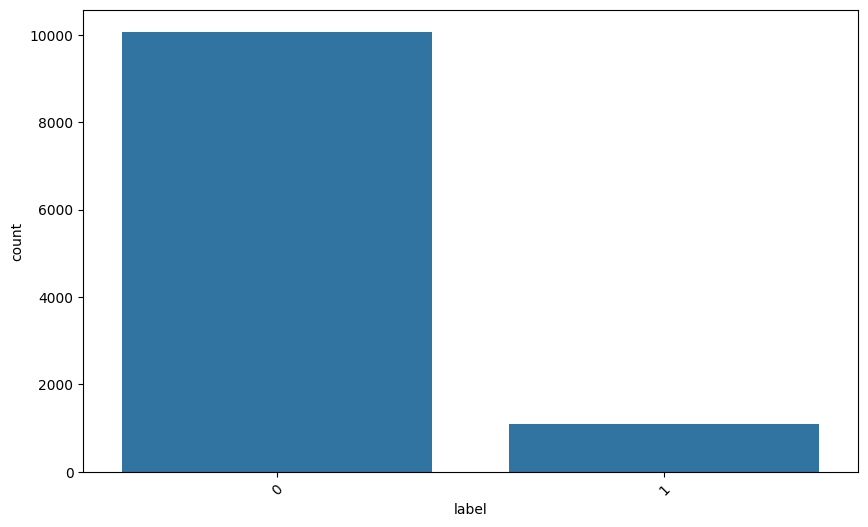

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=xt, order=xt['label'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [ ]:
xt.head(10)

,mesaj,label
0,olduktan iki hafta sonra bulundular.,0
1,sizi şarlatanlar,1
2,Acı gerçek Müge Anlı'da ortaya çıktı. #MügeAnl...,0
3,Suçlu tabii konuşamaz Allahın belası. O anneye...,0
4,Müge anlı olmazsa demeki adalet sağlanmayacak,0
5,Şarlatan köpekler,1
6,Konuyu anlayamadım dün bunlar bunları bulmak i...,0
7,Adalet bu ülkeden gideli çooook oldu,0
8,👏👏👏aynen,0
9,Malesef😭😭😭,0


# 2- Veri Ön İşleme

Tokenizasyon:
Metinler kelimelere veya alt kelimelere ayrılacak.
Düşük Frekanslı Kelimelerin Çıkarılması:
Sıklığı düşük olan kelimeler veri setinden çıkarılacak (Stop-Word).

In [ ]:
def Tstopw(text):
    text = re.sub(r' En ', ' ', text)
    text = re.sub(r' en ', ' ', text)
    text = re.sub(r' ile ', ' ', text)
    text = re.sub(r' ve ', ' ', text)
    text = re.sub(r' bir ', ' ', text)
    text = re.sub(r' çok ', ' ', text)
    text = re.sub(r' farklı ', ' ', text)
    text = re.sub(r' ama ', ' ', text)
    text = re.sub(r' ama ', ' ', text)
    text = re.sub(r' acaba ', ' ', text)
    text = re.sub(r' altı ', ' ', text)
    text = re.sub(r' ama ', ' ', text)

    text = re.sub(r' artık ', ' ', text)
    text = re.sub(r' asla ', ' ', text)
    text = re.sub(r' aslında ', ' ', text)
    text = re.sub(r' az ', ' ', text)
    text = re.sub(r' bana ', ' ', text)
    text = re.sub(r' bazen ', ' ', text)
    text = re.sub(r' bazı ', ' ', text)
    text = re.sub(r' bazıları ', ' ', text)
    text = re.sub(r' bazısı ', ' ', text)
    text = re.sub(r' belki ', ' ', text)
    text = re.sub(r' ben ', ' ', text)
    text = re.sub(r' beni ', ' ', text)
    text = re.sub(r' benim ', ' ', text)
    text = re.sub(r' beş ', ' ', text)

    text = re.sub(r' bir ', ' ', text)
    text = re.sub(r' birçoğu ', ' ', text)
    text = re.sub(r' birçok ', ' ', text)
    text = re.sub(r' birçokları ', ' ', text)
    text = re.sub(r' biri', ' ', text)
    text = re.sub(r' birisi ', ' ', text)
    text = re.sub(r' birkaç ', ' ', text)
    text = re.sub(r' birkaçı ', ' ', text)
    text = re.sub(r' birşey ', ' ', text)
    text = re.sub(r' birşeyi ', ' ', text)
    text = re.sub(r' biz ', ' ', text)
    text = re.sub(r' bize ', ' ', text)
    text = re.sub(r' bizi ', ' ', text)
    text = re.sub(r' bizim ', ' ', text)
    text = re.sub(r' böyle ', ' ', text)
    text = re.sub(r' böylece ', ' ', text)
    text = re.sub(r' bu ', ' ', text)
    text = re.sub(r' buna ', ' ', text)
    text = re.sub(r' bunda ', ' ', text)
    text = re.sub(r' bundan ', ' ', text)
    text = re.sub(r' bunu ', ' ', text)
    text = re.sub(r' bunun ', ' ', text)
    text = re.sub(r' burada ', ' ', text)
    text = re.sub(r' bütün ', ' ', text)
    text = re.sub(r' çoğu ', ' ', text)
    text = re.sub(r' çoğuna ', ' ', text)
    text = re.sub(r' çoğunu ', ' ', text)
    text = re.sub(r' çok ', ' ', text)
    text = re.sub(r' çünkü ', ' ', text)
    text = re.sub(r' da ', ' ', text)
    text = re.sub(r' daha ', ' ', text)
    text = re.sub(r' de ', ' ', text)
    text = re.sub(r' değil ', ' ', text)
    text = re.sub(r' demek ', ' ', text)
    text = re.sub(r' diğer ', ' ', text)
    text = re.sub(r' diğeri ', ' ', text)
    text = re.sub(r' diğerleri ', ' ', text)
    text = re.sub(r' diye ', ' ', text)
    text = re.sub(r' dokuz ', ' ', text)
    text = re.sub(r' dolayı ', ' ', text)
    text = re.sub(r' dört ', ' ', text)
    text = re.sub(r' elbette ', ' ', text)
    text = re.sub(r' en ', ' ', text)
    text = re.sub(r' fakat ', ' ', text)
    text = re.sub(r' falan ', ' ', text)
    text = re.sub(r' filan ', ' ', text)
    text = re.sub(r' felan ', ' ', text)
    text = re.sub(r' filan ', ' ', text)
    text = re.sub(r' gene ', ' ', text)
    text = re.sub(r' gibi ', ' ', text)
    text = re.sub(r' hâlâ ', ' ', text)
    text = re.sub(r' hangi ', ' ', text)
    text = re.sub(r' hangisi ', ' ', text)
    text = re.sub(r' hani ', ' ', text)
    text = re.sub(r' hatta ', ' ', text)
    text = re.sub(r' hem ', ' ', text)
    text = re.sub(r' henüz ', ' ', text)
    text = re.sub(r' hep ', ' ', text)
    text = re.sub(r' hepsi ', ' ', text)
    text = re.sub(r' hepsine ', ' ', text)
    text = re.sub(r' hepsini ', ' ', text)
    text = re.sub(r' her ', ' ', text)
    text = re.sub(r' her biri ', ' ', text)
    text = re.sub(r' herkes ', ' ', text)
    text = re.sub(r' herkese ', ' ', text)
    text = re.sub(r' herkesi ', ' ', text)
    text = re.sub(r' hiç ', ' ', text)
    text = re.sub(r' hiç kimse ', ' ', text)
    text = re.sub(r' hiçbiri ', ' ', text)
    text = re.sub(r' hiçbirine ', ' ', text)
    text = re.sub(r' hiçbirini ', ' ', text)
    text = re.sub(r' için ', ' ', text)
    text = re.sub(r' içinde ', ' ', text)
    text = re.sub(r' iki ', ' ', text)
    text = re.sub(r' ile ', ' ', text)
    text = re.sub(r' ise ', ' ', text)
    text = re.sub(r' işte ', ' ', text)
    text = re.sub(r' kaç ', ' ', text)
    text = re.sub(r' kadar ', ' ', text)
    text = re.sub(r' kendi ', ' ', text)
    text = re.sub(r' kendine ', ' ', text)
    text = re.sub(r' kendini ', ' ', text)
    text = re.sub(r' ki ', ' ', text)

    text = re.sub(r' kime ', ' ', text)
    text = re.sub(r' kimi ', ' ', text)
    text = re.sub(r' kimin ', ' ', text)
    text = re.sub(r' kimisi ', ' ', text)
    text = re.sub(r' madem ', ' ', text)
    text = re.sub(r' mı ', ' ', text)
    text = re.sub(r' mı ', ' ', text)
    text = re.sub(r' mi ', ' ', text)
    text = re.sub(r' mu ', ' ', text)
    text = re.sub(r' mu ', ' ', text)
    text = re.sub(r' mü ', ' ', text)
    text = re.sub(r' mü ', ' ', text)
    text = re.sub(r' nasıl ', ' ', text)
    text = re.sub(r' ne ', ' ', text)
    text = re.sub(r' ne kadar ', ' ', text)
    text = re.sub(r' ne zaman ', ' ', text)
    text = re.sub(r' neden ', ' ', text)
    text = re.sub(r' nedir ', ' ', text)
    text = re.sub(r' nerde ', ' ', text)
    text = re.sub(r' nerede ', ' ', text)
    text = re.sub(r' nereden ', ' ', text)
    text = re.sub(r' nereye ', ' ', text)
    text = re.sub(r' nesi ', ' ', text)
    text = re.sub(r' neyse ', ' ', text)
    text = re.sub(r' niçin ', ' ', text)
    text = re.sub(r' niye ', ' ', text)
    text = re.sub(r' on ', ' ', text)
    text = re.sub(r' ona ', ' ', text)
    text = re.sub(r' ondan ', ' ', text)
    text = re.sub(r' onlar ', '', text)
    text = re.sub(r' onlara ', ' ', text)
    text = re.sub(r' onlardan ', ' ', text)
    text = re.sub(r' onların ', ' ', text)
    text = re.sub(r' onların ', ' ', text)
    text = re.sub(r' onu ', ' ', text)
    text = re.sub(r' onun ', ' ', text)
    text = re.sub(r' orada ', ' ', text)
    text = re.sub(r' oysa ', ' ', text)
    text = re.sub(r' oysaki ', ' ', text)
    text = re.sub(r' öbürü ', ' ', text)
    text = re.sub(r' ön ', ' ', text)
    text = re.sub(r' önce ', ' ', text)
    text = re.sub(r' ötürü ', ' ', text)
    text = re.sub(r' öyle ', ' ', text)
    text = re.sub(r' rağmen ', ' ', text)
    text = re.sub(r' sana ', ' ', text)
    text = re.sub(r' sekiz ', ' ', text)
    text = re.sub(r' sen ', '', text)
    text = re.sub(r' senden ', ' ', text)
    text = re.sub(r' seni ', ' ', text)
    text = re.sub(r' senin ', ' ', text)
    text = re.sub(r' siz ', ' ', text)
    text = re.sub(r' sizden ', ' ', text)
    text = re.sub(r' size ', ' ', text)
    text = re.sub(r' sizi ', ' ', text)
    text = re.sub(r' sizin ', ' ', text)
    text = re.sub(r' son ', ' ', text)
    text = re.sub(r' sonra ', ' ', text)
    text = re.sub(r' şayet ', ' ', text)
    text = re.sub(r' şey ', ' ', text)
    text = re.sub(r' şeyden ', ' ', text)
    text = re.sub(r' şeye ', ' ', text)
    text = re.sub(r' şeyi ', ' ', text)
    text = re.sub(r' şeyler ', ' ', text)
    text = re.sub(r' şimdi ', '', text)
    text = re.sub(r' şöyle ', ' ', text)
    text = re.sub(r' şu ', ' ', text)
    text = re.sub(r' şuna ', ' ', text)
    text = re.sub(r' şunda ', ' ', text)
    text = re.sub(r' şundan ', ' ', text)
    text = re.sub(r' şunlar ', ' ', text)
    text = re.sub(r' şunu ', ' ', text)
    text = re.sub(r' şunun ', ' ', text)
    text = re.sub(r' tabi ', ' ', text)
    text = re.sub(r' tamam ', ' ', text)
    text = re.sub(r' tüm ', ' ', text)
    text = re.sub(r' tümü ', ' ', text)
    text = re.sub(r' üç ', ' ', text)
    text = re.sub(r' üzere ', ' ', text)
    text = re.sub(r' var ', ' ', text)
    text = re.sub(r' ve ', ' ', text)
    text = re.sub(r' veya ', ' ', text)
    text = re.sub(r' veyahut ', ' ', text)
    text = re.sub(r' ya ', ' ', text)
    text = re.sub(r' ya da', ' ', text)
    text = re.sub(r' yani ', ' ', text)
    text = re.sub(r' yedi ', ' ', text)
    text = re.sub(r' yerine ', ' ', text)
    text = re.sub(r' yine ', ' ', text)
    text = re.sub(r' yoksa ', ' ', text)
    text = re.sub(r' zaten ', ' ', text)
    text = re.sub(r' zira ', ' ', text)
    text = re.sub(r' o ', ' ', text)
    return text

Temizlik:
Toplanan verilerdeki gereksiz karakterler, boşluklar ve özel semboller temizlenecek.

In [ ]:
def process_msg(text):
    text = re.sub(r'(@|https?)\S+|#', '', text)
    filters='@!"\'#$%&()*+,-./:;<=>?[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    text = text.lower()
    text = text.strip()
    return text

In [ ]:
y_train=xt['label']
xt['mesaj']= xt['mesaj'].apply(Tstopw)
xt['mesaj']= xt['mesaj'].apply(process_msg)


In [ ]:
x_train.head(10)

0                            olduktan hafta bulundular
1                                     sizi şarlatanlar
2    acı gerçek müge anlı ortaya çıktı  mügeanlıi̇l...
3    suçlu tabii konuşamaz allahın belası  anneye a...
4        müge anlı olmazsa demeki adalet sağlanmayacak
5                                    şarlatan köpekler
6    konuyu anlayamadım dün bunlar bunları bulmak g...
7                    adalet ülkeden gideli çooook oldu
8                                             👏👏👏aynen
9                                           malesef😭😭😭
Name: mesaj, dtype: object

Kelime Gömme:
Kelimeleri sayısal verilere dönüştürmek için Word2Vec, GloVe veya FastText gibi teknikler kullanılacak.

In [ ]:
embedding_dim = 300
embeddings_index = dict(get_coefs(*o.strip().split()) for o in open('/content/drive/My Drive/RNNs_homofobia/vectors.txt'))

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

253832: Bu,
embedding matrisinde bulunan toplam kelime (veya token) sayısını ifade eder.
300: Her kelimenin temsil edildiği vektörün boyutudur. Bu, GloVe vektörlerinin standart boyutlarından biridir ve genellikle kelimelerin anlamını daha iyi temsil etmek için kullanılır.

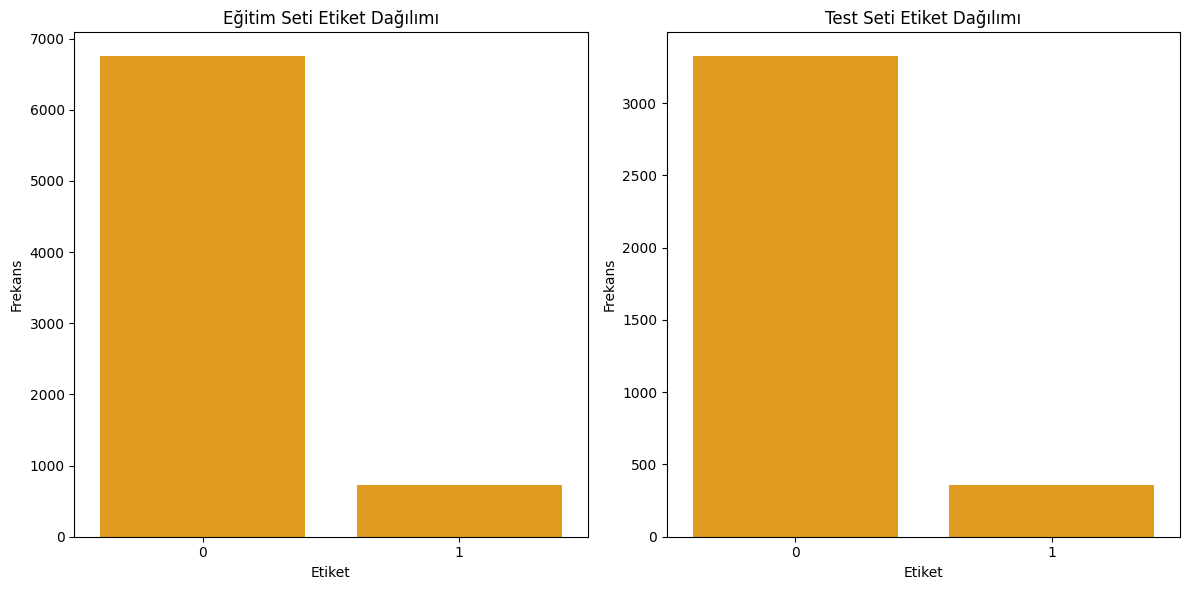

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

test_sets = []
train_sets = []

for label in xt['label'].unique():
    label_data = xt[xt['label'] == label]
    test_size = int(len(label_data) * 0.33)
    test_set = label_data.sample(n=test_size, random_state=42)
    train_set = label_data.drop(test_set.index)

    test_sets.append(test_set)
    train_sets.append(train_set)


test_set = pd.concat(test_sets).reset_index(drop=True)
train_set = pd.concat(train_sets).reset_index(drop=True)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.countplot(x='label', data=train_set, color='orange')
plt.title('Eğitim Seti Etiket Dağılımı')
plt.xlabel('Etiket')
plt.ylabel('Frekans')


plt.subplot(1, 2, 2)
sns.countplot(x='label', data=test_set, color='orange')
plt.title('Test Seti Etiket Dağılımı')
plt.xlabel('Etiket')
plt.ylabel('Frekans')

plt.tight_layout()
plt.show()